In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
from datetime import datetime
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
#Global variables
DATA_SET_PATH_CSV = "/content/drive/Shareddrives/CIE 417 Project/Dummy dataset.csv"
DATA_SET_PATH_X = "/content/drive/Shareddrives/CIE 417 Project/Dummy_dataset.xlsx"

In [ ]:
df = pd.read_csv(DATA_SET_PATH_CSV)
df.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,"178,630",120,10 Years,7/31/2019,4/3/2029,0,6/23/1983,38.5,48.04,MALE,Salaried
1,"376,445",120,10 Years,3/4/2019,7/3/2028,0,9/30/1963,58.2,67.12,MALE,Salaried
2,"253,984",84,7 Years,5/5/2019,7/3/2025,0,2/24/1965,56.8,63.08,MALE,Salaried
3,"779,620",108,9 Years,4/26/2021,4/25/2030,5,12/1/1983,38.0,46.10,MALE,Self Employed & Professional
4,"103,377",60,5 Years,4/27/2021,4/25/2026,0,8/8/1981,40.3,45.02,MALE,Salaried


In [ ]:
df.dtypes

Total O/S           object
TENOR_@Booking       int64
Loan Term           object
BOOKING_DATE        object
MATURITY_DATE       object
 DPD                 int64
DOB                 object
AGE                 object
AGE at Maturity     object
GENDER              object
Customer Segment    object
dtype: object

In [ ]:
df2 = pd.read_excel(DATA_SET_PATH_X)
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,1948-04-04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,1967-12-27,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,1963-08-01,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,1946-10-26,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,1945-02-17,MALE,Salaried


In [ ]:
df2.dtypes

Total O/S                  float64
TENOR_@Booking               int64
Loan Term                   object
BOOKING_DATE        datetime64[ns]
MATURITY_DATE       datetime64[ns]
 DPD                         int64
DOB                 datetime64[ns]
AGE                        float64
AGE at Maturity     datetime64[ns]
GENDER                      object
Customer Segment            object
dtype: object

In [ ]:
##replacing age at maturaty in xlsx file
df2['AGE at Maturity']=df['AGE at Maturity']
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,48.04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,67.12,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,63.08,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,46.10,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,45.02,MALE,Salaried


In [ ]:
df2.dtypes

Total O/S                  float64
TENOR_@Booking               int64
Loan Term                   object
BOOKING_DATE        datetime64[ns]
MATURITY_DATE       datetime64[ns]
 DPD                         int64
DOB                 datetime64[ns]
AGE                        float64
AGE at Maturity             object
GENDER                      object
Customer Segment            object
dtype: object

In [ ]:
df2.isnull().sum()

Total O/S            0
TENOR_@Booking       0
Loan Term            0
BOOKING_DATE         0
MATURITY_DATE        0
 DPD                 0
DOB                 84
AGE                 84
AGE at Maturity     84
GENDER               8
Customer Segment    19
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df2.isnull().sum()

Total O/S           0
TENOR_@Booking      0
Loan Term           0
BOOKING_DATE        0
MATURITY_DATE       0
 DPD                0
DOB                 0
AGE                 0
AGE at Maturity     0
GENDER              0
Customer Segment    0
dtype: int64

In [ ]:
df2.duplicated().sum()

798

In [ ]:
df2.drop_duplicates(inplace=True)

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2["AGE at Maturity"]

0        48.04
1        67.12
2        63.08
3        46.10
4        45.02
         ...  
38680    54.12
38681    49.05
38682    50.03
38683    44.09
38684    47.09
Name: AGE at Maturity, Length: 37779, dtype: object

In [ ]:
df2["AGE at Maturity"] = pd.to_numeric(df["AGE at Maturity"],errors='coerce')

In [ ]:
df2["AGE at Maturity"] 

0        48.04
1        67.12
2        63.08
3        46.10
4        45.02
         ...  
38680    54.12
38681    49.05
38682    50.03
38683    44.09
38684    47.09
Name: AGE at Maturity, Length: 37779, dtype: float64

In [ ]:
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,48.04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,67.12,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,63.08,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,46.10,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,45.02,MALE,Salaried


In [ ]:
df2.dtypes

Total O/S                  float64
TENOR_@Booking               int64
Loan Term                   object
BOOKING_DATE        datetime64[ns]
MATURITY_DATE       datetime64[ns]
 DPD                         int64
DOB                 datetime64[ns]
AGE                        float64
AGE at Maturity            float64
GENDER                      object
Customer Segment            object
dtype: object

In [ ]:
df2.DOB.values.astype(np.int64)

array([ 425174400000000000, -197424000000000000, -153100800000000000, ...,
        332812800000000000,  473558400000000000,  412041600000000000])

###Data Visulaizaion###

In [ ]:
dict(df2.dtypes)

{' DPD': dtype('int64'),
 'AGE': dtype('float64'),
 'AGE at Maturity': dtype('float64'),
 'BOOKING_DATE': dtype('<M8[ns]'),
 'Customer Segment': dtype('O'),
 'DOB': dtype('<M8[ns]'),
 'GENDER': dtype('O'),
 'Loan Term': dtype('O'),
 'MATURITY_DATE': dtype('<M8[ns]'),
 'TENOR_@Booking': dtype('int64'),
 'Total O/S': dtype('float64')}

<h3> Ploting histogram of numeric columns</h3>

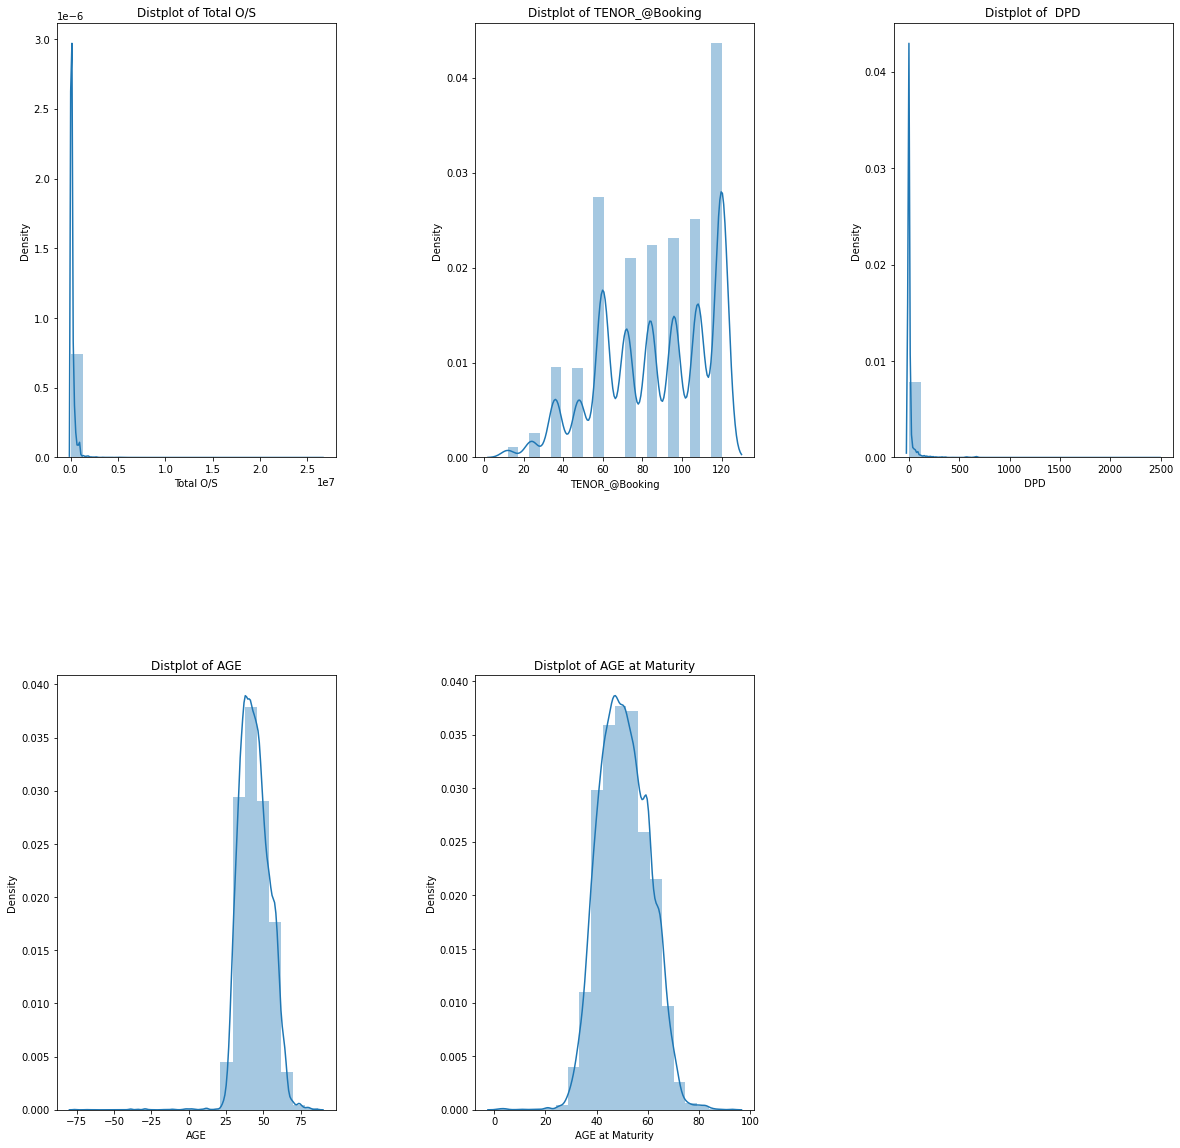

In [ ]:
import math
plt.figure(1 , figsize = (20 , 20))
n = 0 
temp_df_num = df2.select_dtypes(include=[np.number]) 
for x in temp_df_num.columns:
    n += 1
    plt.subplot(math.ceil(len(temp_df_num.columns)/3) , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(temp_df_num[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<h3> Gender distribution</h3>

In [ ]:
di = { "Male": "MALE",  "Female": "FEMALE"}
df2['GENDER'].replace(di, inplace=True)
df2['GENDER'].value_counts()

MALE      31720
FEMALE     6059
Name: GENDER, dtype: int64

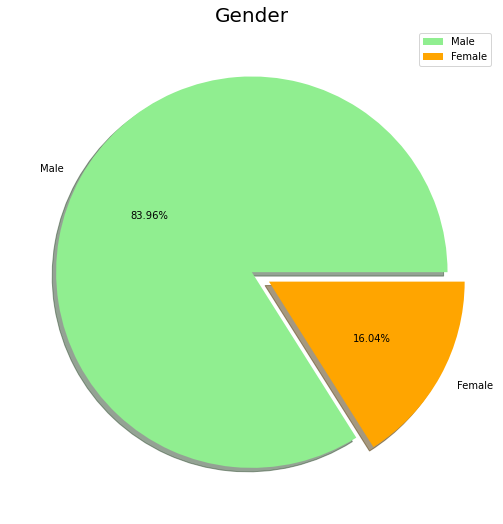

In [ ]:
labels = ['Male', 'Female']
size = df2['GENDER'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
df2['DOB']=df2.DOB.values.astype(np.int64)

In [ ]:
df2['BOOKING_DATE']=df2.BOOKING_DATE.values.astype(np.int64)

In [ ]:
df2['MATURITY_DATE']=df2.MATURITY_DATE.values.astype(np.int64)

In [ ]:
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,1564531200000000000,1869868800000000000,0,425174400000000000,38.469863,48.04,MALE,Salaried
1,376444.57,120,10 Years,1551657600000000000,1846195200000000000,0,-197424000000000000,58.212329,67.12,MALE,Salaried
2,253984.28,84,7 Years,1557014400000000000,1751500800000000000,0,-153100800000000000,56.806849,63.08,MALE,Salaried
3,779620.11,108,9 Years,1619395200000000000,1903305600000000000,5,439084800000000000,38.028767,46.10,MALE,Self Employed & Professional
4,103377.43,60,5 Years,1619481600000000000,1777075200000000000,0,366076800000000000,40.343836,45.02,MALE,Salaried


In [ ]:
years_map = dict()
for i in range(100):
  if not i== 0:
    years_map[f"{i} Years"] = i

years_map["1 Year"] = 1

In [ ]:
df2['Loan Term']

0        10 Years
1        10 Years
2         7 Years
3         9 Years
4         5 Years
           ...   
38680     9 Years
38681     8 Years
38682     9 Years
38683     8 Years
38684     9 Years
Name: Loan Term, Length: 37779, dtype: object

In [ ]:
t = df2['Loan Term'].replace(years_map, inplace=False)

In [ ]:
pd.to_numeric(t,errors='coerce')

0        10.0
1        10.0
2         7.0
3         9.0
4         5.0
         ... 
38680     9.0
38681     8.0
38682     9.0
38683     8.0
38684     9.0
Name: Loan Term, Length: 37779, dtype: float64

In [ ]:
df2['Loan Term']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
38680   NaN
38681   NaN
38682   NaN
38683   NaN
38684   NaN
Name: Loan Term, Length: 37779, dtype: float64

In [ ]:
di = { "MALE" :0,  "FEMALE":1}
df2['GENDER'].replace(di, inplace=True)




In [ ]:
df2['GENDER']

0        0
1        0
2        0
3        0
4        0
        ..
38680    0
38681    0
38682    0
38683    0
38684    0
Name: GENDER, Length: 37779, dtype: int64

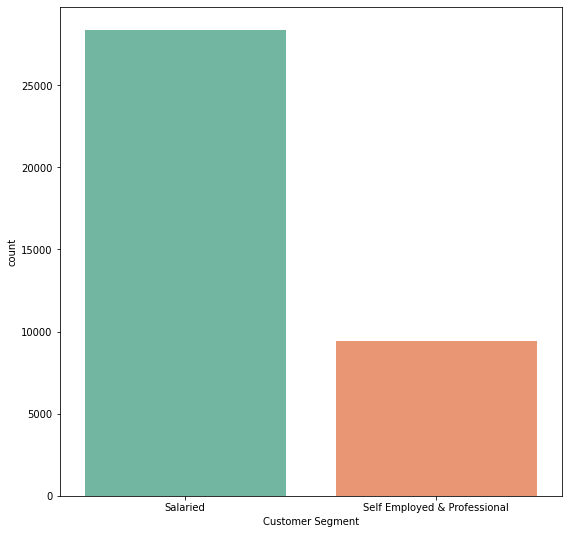

In [ ]:
sns.countplot(x='Customer Segment', data=df2, palette='Set2')
plt.show()

In [ ]:
di = { "Salaried" :0,  "Self Employed & Professional":1}
df2['Customer Segment'].replace(di, inplace=True)

In [ ]:
df2['Customer Segment']

0        0
1        0
2        0
3        1
4        0
        ..
38680    0
38681    0
38682    0
38683    0
38684    0
Name: Customer Segment, Length: 37779, dtype: int64

In [ ]:
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,NaN,1564531200000000000,1869868800000000000,0,425174400000000000,38.469863,48.04,0,0
1,376444.57,120,NaN,1551657600000000000,1846195200000000000,0,-197424000000000000,58.212329,67.12,0,0
2,253984.28,84,NaN,1557014400000000000,1751500800000000000,0,-153100800000000000,56.806849,63.08,0,0
3,779620.11,108,NaN,1619395200000000000,1903305600000000000,5,439084800000000000,38.028767,46.10,0,1
4,103377.43,60,NaN,1619481600000000000,1777075200000000000,0,366076800000000000,40.343836,45.02,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37779 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total O/S         37779 non-null  float64
 1   TENOR_@Booking    37779 non-null  int64  
 2   Loan Term         0 non-null      float64
 3   BOOKING_DATE      37779 non-null  int64  
 4   MATURITY_DATE     37779 non-null  int64  
 5    DPD              37779 non-null  int64  
 6   DOB               37779 non-null  int64  
 7   AGE               37779 non-null  float64
 8   AGE at Maturity   37735 non-null  float64
 9   GENDER            37779 non-null  int64  
 10  Customer Segment  37779 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.7 MB


In [ ]:
df2["GENDER"] = pd.to_numeric(df["GENDER"],errors='coerce')

###Data Visualization ###

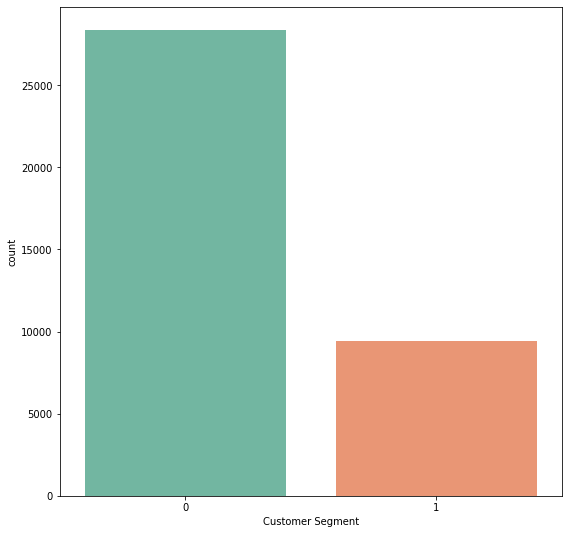

In [ ]:
sns.countplot(x='Customer Segment', data=df2, palette='Set2')
plt.show()

In [ ]:
df2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,NaN,1564531200000000000,1869868800000000000,0,425174400000000000,38.469863,48.04,NaN,0
1,376444.57,120,NaN,1551657600000000000,1846195200000000000,0,-197424000000000000,58.212329,67.12,NaN,0
2,253984.28,84,NaN,1557014400000000000,1751500800000000000,0,-153100800000000000,56.806849,63.08,NaN,0
3,779620.11,108,NaN,1619395200000000000,1903305600000000000,5,439084800000000000,38.028767,46.10,NaN,1
4,103377.43,60,NaN,1619481600000000000,1777075200000000000,0,366076800000000000,40.343836,45.02,NaN,0
